**Import Libraries**

In [ ]:
# importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import datetime
from datetime import date
import random


**Import Data**

In [ ]:
data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [ ]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


let’s check out the data types of each column.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


We start with converting `date_time` column to **datetime** and set it as an index

In [ ]:
data['date_time'] =  pd.to_datetime(data['date_time'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
data = data.set_index(pd.DatetimeIndex(data['date_time']))

In [ ]:
data.dtypes

holiday                        object
temp                          float64
rain_1h                       float64
snow_1h                       float64
clouds_all                      int64
weather_main                   object
weather_description            object
date_time              datetime64[ns]
traffic_volume                  int64
dtype: object

Let's extract only 2 years data and create our time serie

In [ ]:
data.index.min(), data.index.max()

(Timestamp('2012-10-02 09:00:00'), Timestamp('2018-09-30 23:00:00'))

In [ ]:
ts = data['2016-09-30':'2018-09-29']

In [ ]:
ts

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
date_time,,,,,,,,,
2016-09-30 00:00:00,None,284.26,0.0,0.0,0,Clear,Sky is Clear,2016-09-30 00:00:00,660
2016-09-30 01:00:00,None,283.99,0.0,0.0,0,Clear,Sky is Clear,2016-09-30 01:00:00,384
2016-09-30 02:00:00,None,283.17,0.0,0.0,0,Clear,Sky is Clear,2016-09-30 02:00:00,281
2016-09-30 03:00:00,None,282.43,0.0,0.0,0,Clear,Sky is Clear,2016-09-30 03:00:00,395
2016-09-30 04:00:00,None,282.87,0.0,0.0,0,Clear,Sky is Clear,2016-09-30 04:00:00,810
...,...,...,...,...,...,...,...,...,...
2018-09-29 19:00:00,None,280.68,0.0,0.0,90,Clouds,overcast clouds,2018-09-29 19:00:00,3818
2018-09-29 20:00:00,None,280.55,0.0,0.0,90,Clouds,overcast clouds,2018-09-29 20:00:00,3338
2018-09-29 21:00:00,None,280.40,0.0,0.0,90,Clouds,overcast clouds,2018-09-29 21:00:00,2950


Cheking missing values

In [ ]:
ts.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

In [ ]:
ts.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,21193.000000,21193.000000,21193.0,21193.000000,21193.000000
mean,281.267273,0.046567,0.0,48.146322,3271.748974
std,12.384096,0.390838,0.0,39.730445,1969.818720
min,243.390000,0.000000,0.0,0.000000,113.000000
25%,272.420000,0.000000,0.0,1.000000,1228.000000
50%,281.987000,0.000000,0.0,44.000000,3434.000000
75%,291.620000,0.000000,0.0,90.000000,4912.000000
max,310.070000,10.600000,0.0,100.000000,7280.000000


In [ ]:
ts.describe(include='object')

,holiday,weather_main,weather_description
count,21193,21193,21193
unique,12,10,34
top,None,Clear,sky is clear
freq,21166,6222,5801


In [ ]:
#Extracting features from date_time variable
ts['weekday'] = ts.date_time.dt.day_name
ts['hour'] = ts.date_time.dt.hour
ts['month'] = ts.date_time.dt.month
ts['year'] = ts.date_time.dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

# Univariate Analysis

In [ ]:
# Using graph_objects
import plotly.graph_objects as go
# scatter plot between traffic volume and date_time
layout = go.Layout(title='Traffic volume', xaxis=dict(title='Date'))
fig = go.Figure([go.Scatter(x=ts['date_time'], y=ts['traffic_volume'])], layout=layout)
fig.show()

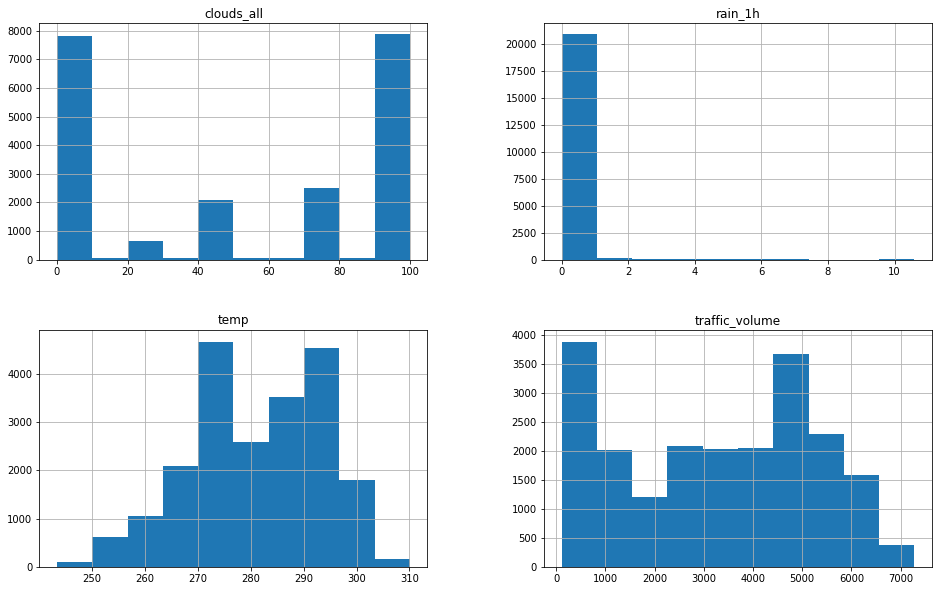

In [ ]:
ts[['clouds_all','rain_1h','temp','traffic_volume']].hist(figsize=(16,10))
plt.show()

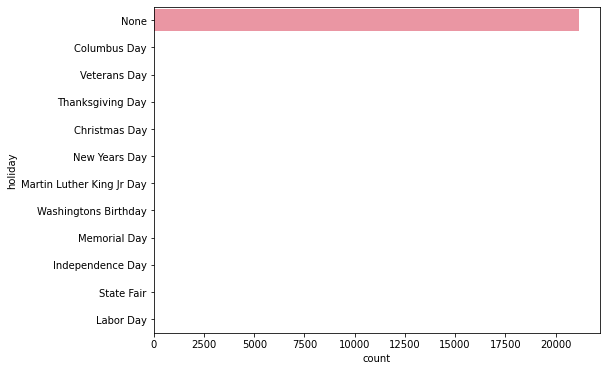

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(y='holiday', data = ts)
plt.show()

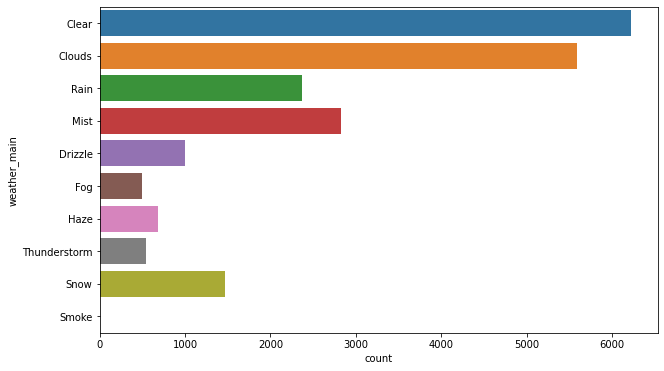

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(y='weather_main', data = ts)
plt.show()

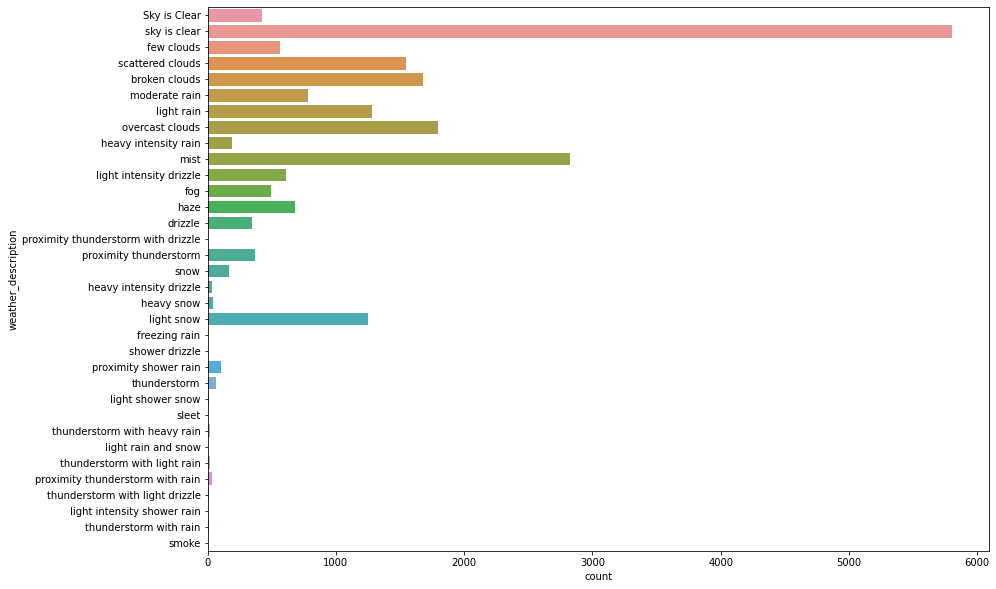

In [ ]:
plt.figure(figsize = (14,10))
sns.countplot(y='weather_description', data = ts)
plt.show()

# Seasonality

let’s further explore the seasonality of our data with box plots

In [ ]:
# detect which day and date has muximum volume
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(
                x=ts.date_time,
                y=ts['traffic_volume'],
                name="traffic volume",
                line_color='deepskyblue',
                opacity=0.8),
                secondary_y=False)

fig.add_trace(go.Scatter(
                x=ts.date_time,
                y=ts['temp'],
                name="temp",
                line_color='dimgray',
                opacity=0.8),
                secondary_y=True)

# Set x-axis title
fig.update_xaxes(title_text="Datetime")

# Set y-axes titles
fig.update_yaxes(title_text="<b>traffic volume</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>temperature</b>", secondary_y=True)

fig.show()

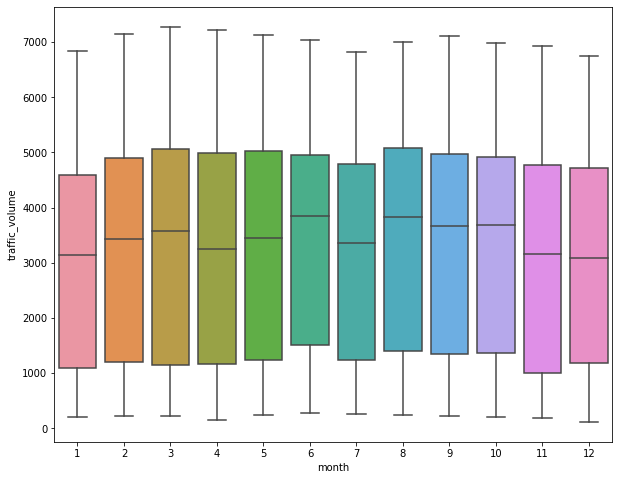

In [ ]:
# see the box plot foe each month 
plt.figure(figsize=(10,8))
sns.boxplot(y='traffic_volume',x='month', data = ts)
plt.show()

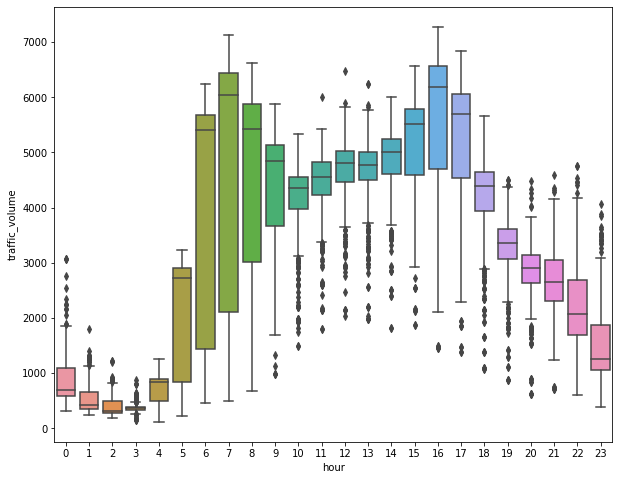

In [ ]:
# this plot to see which hour has most traffic
plt.figure(figsize=(10,8))
sns.boxplot(y='traffic_volume',x='hour', data = ts)
plt.show()

This box plots confirm the daily seasonality
Traffic volumme is generally higher between 6am-9am and 3pm-5pm

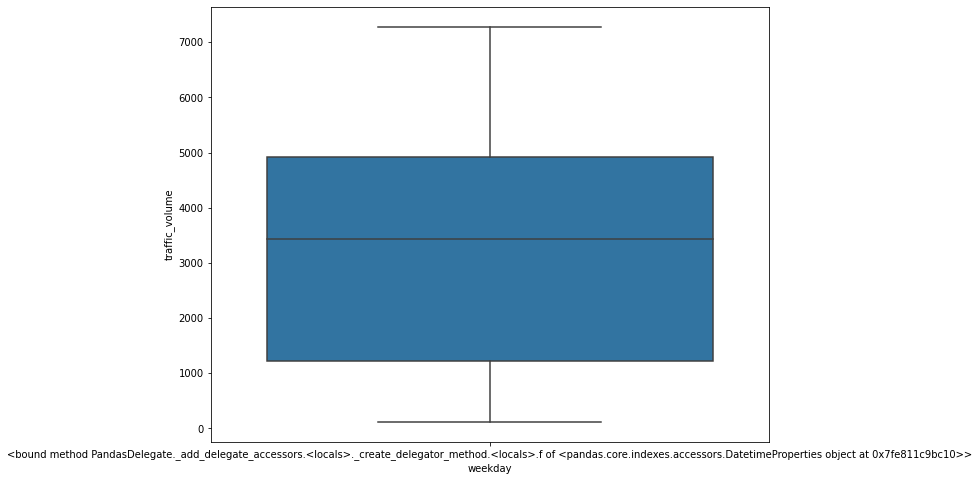

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(y='traffic_volume',x='weekday', data = ts)
plt.show()

Traffic volumme is generally lower in the weekend

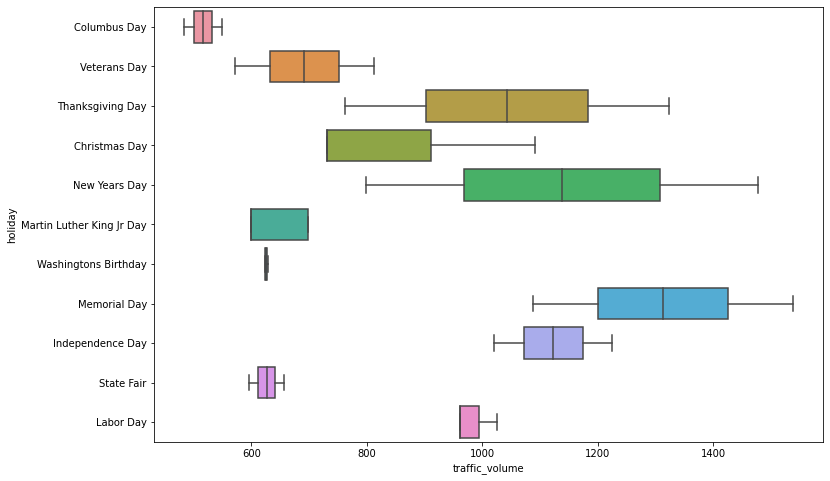

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(y='holiday',x='traffic_volume', data = ts.loc[ts.holiday != 'None'])
plt.show()

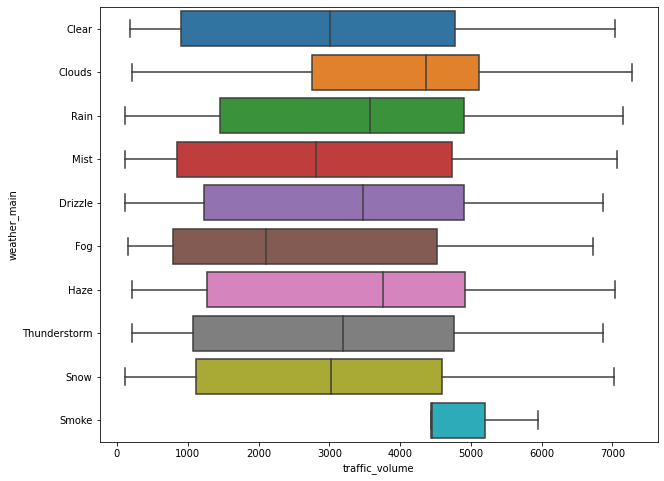

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(y='weather_main',x='traffic_volume', data = ts)
plt.show()

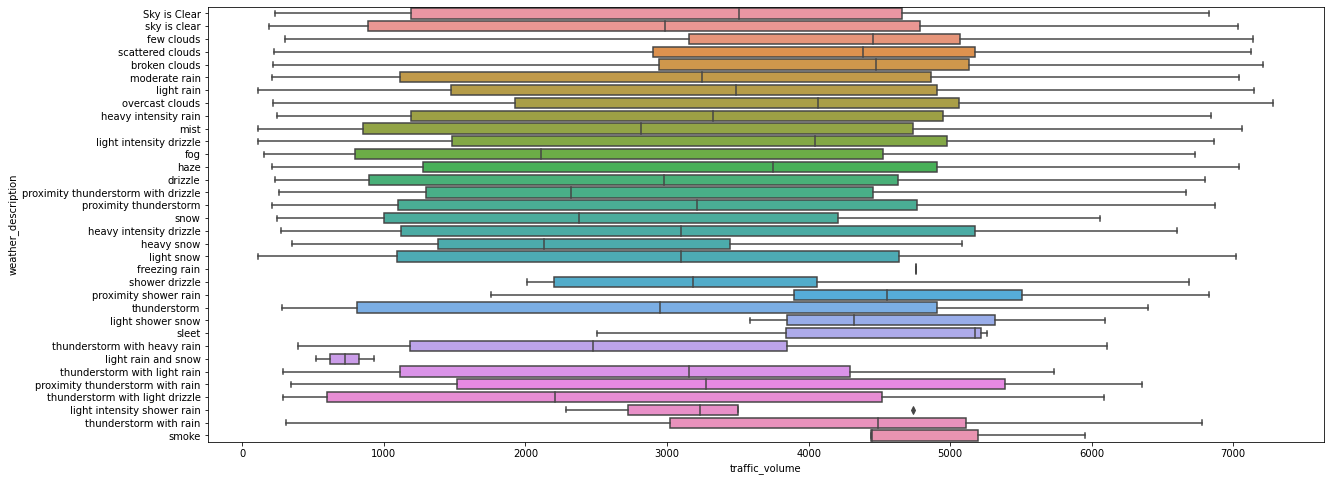

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(x='traffic_volume', y='weather_description', data = ts)
plt.show()

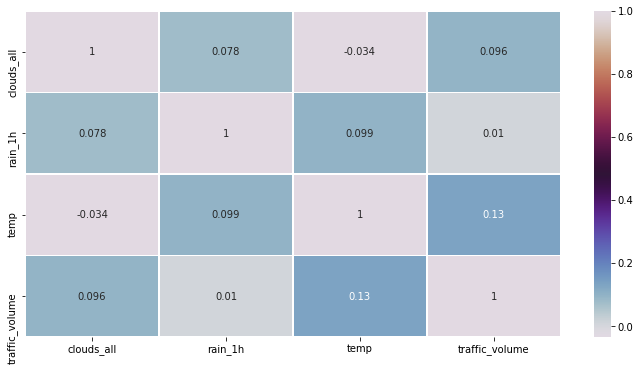

In [ ]:
#correlation between different numeric variables. plot shows no strong correlation between traffic and other variables
cm = ts[['clouds_all','rain_1h','temp','traffic_volume']].corr()

plt.figure(figsize=(12,6))
sns.heatmap(cm,annot=True,linewidths=0.5,cmap='twilight')
plt.show()

There is no high correlation between traffic volume and other variables